In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def load_img():
    blank_img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    text = cv2.putText(blank_img, text = "ABCDE", org = (50, 300), fontFace = font, fontScale = 5, color = (255,255,255), thickness = 25, lineType = cv2.LINE_AA )
    return blank_img
    
    

In [8]:
i = load_img() 

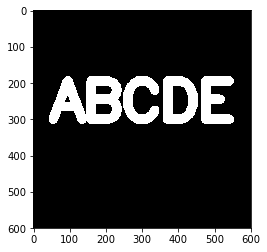

In [9]:
plt.imshow(i, cmap = 'gray')

In [44]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = 'gray')


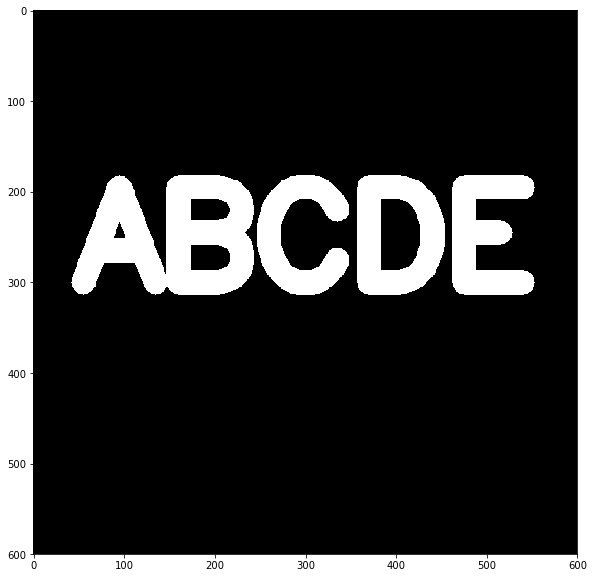

In [45]:
img = load_img()
display_img(img)

In [46]:
kernel = np.ones((5,5), dtype = np.uint8 )

In [ ]:
#erosion

In [47]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [48]:
result = cv2.erode(img, kernel, iterations = 4 )

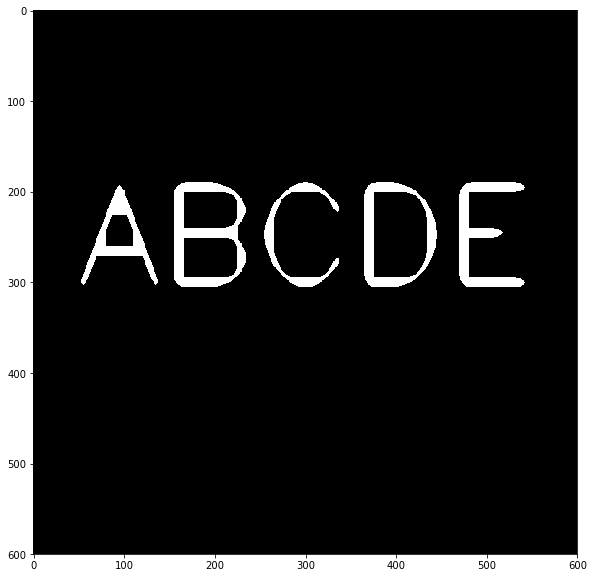

In [49]:
display_img(result)

In [ ]:
#dialation ...Adding noise

In [79]:
img = load_img()

In [80]:
white_noise =  np.random.randint(low = 0, high = 2, size = (600,600))

In [81]:
white_noise 

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 1, ..., 0, 1, 1],
       [1, 0, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 1, 0]])

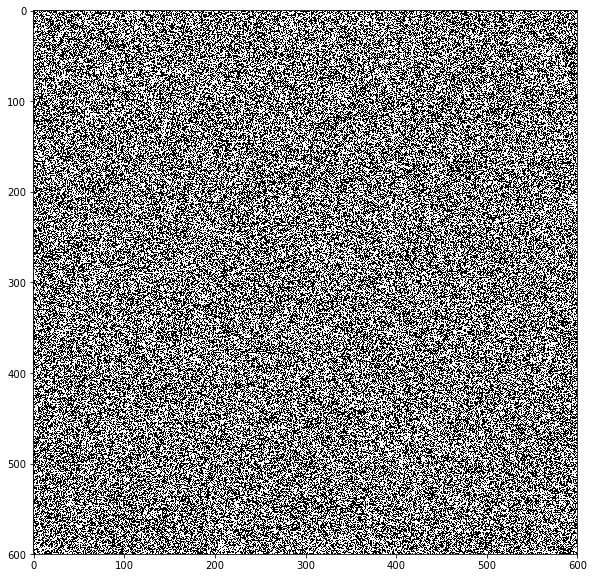

In [82]:
display_img(white_noise)

In [83]:
img.max()

255.0

In [84]:
 #we  have to convert this to 0 to 255, will replec ones with 255

In [85]:
white_noise = white_noise * 255

In [86]:
white_noise

array([[255,   0,   0, ...,   0,   0,   0],
       [  0,   0, 255, ...,   0,   0,   0],
       [255,   0,   0, ..., 255,   0,   0],
       ...,
       [  0, 255, 255, ...,   0, 255, 255],
       [255,   0, 255, ..., 255,   0,   0],
       [255,   0,   0, ..., 255, 255,   0]])

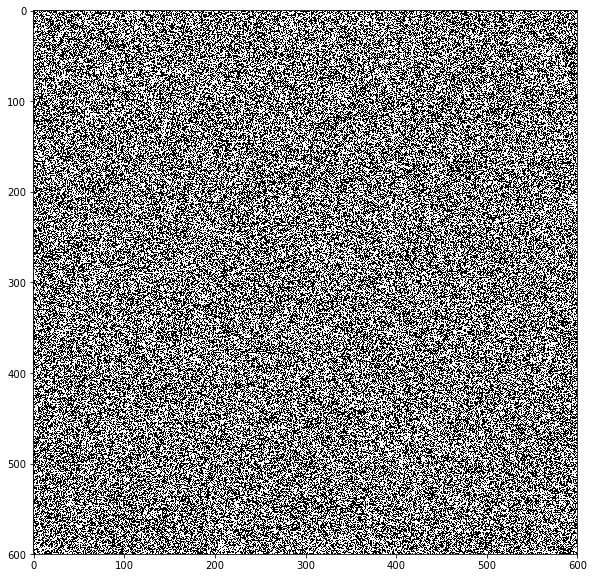

In [87]:
display_img(white_noise)

In [88]:
noise_img  = img + white_noise

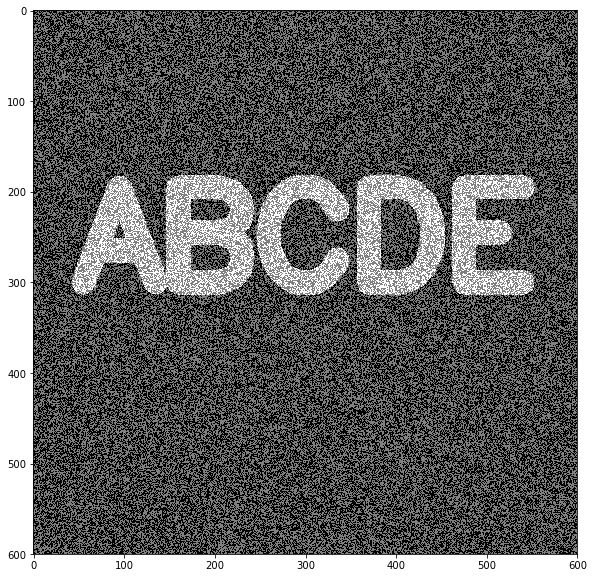

In [89]:
display_img(noise_img)

In [90]:
# to get rid of the noise 
#called opening 

In [94]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)

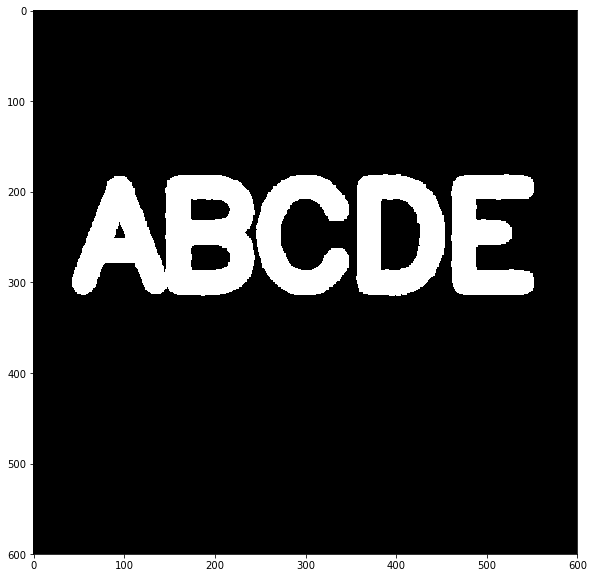

In [95]:
display_img(opening)

In [96]:
#till now we have removed background noise 
#now lets try removing black noise, foreground noise


In [97]:
black_noise = np.random.randint(low = 0, high =2, size = (600,600))

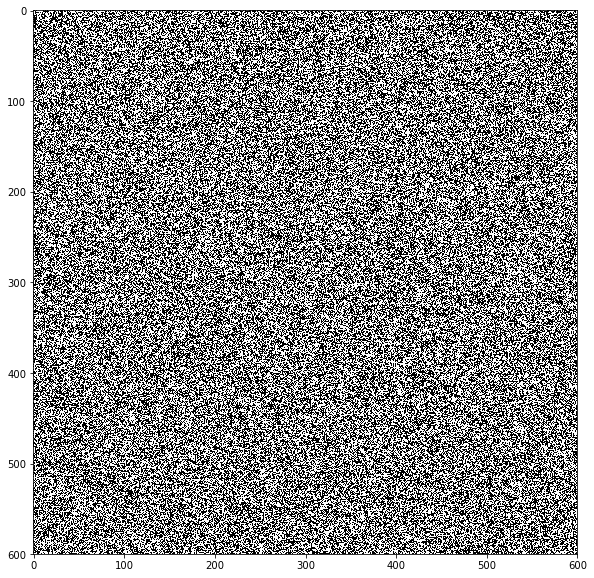

In [100]:
display_img(black_noise) #we will get white  noise only but we have to covert it to black by multiplying -255

In [101]:
black_noise = black_noise * -255

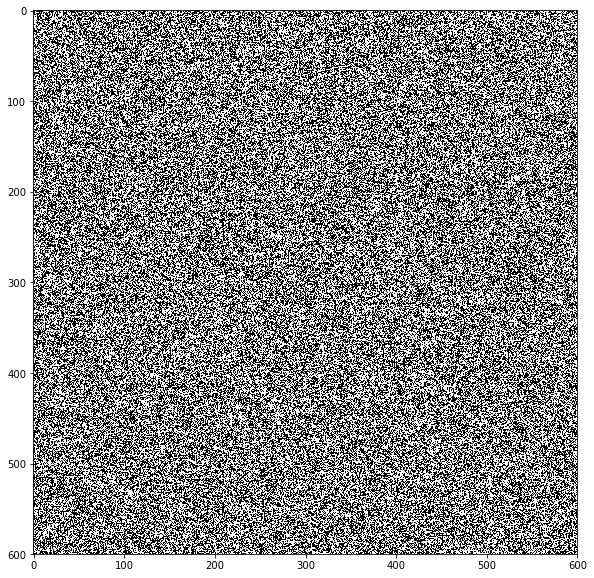

In [103]:
display_img(black_noise) #both look similar, but it will effect the foreground when implemented

In [104]:
black_noise

array([[-255,    0, -255, ...,    0,    0, -255],
       [-255, -255,    0, ...,    0,    0, -255],
       [-255, -255,    0, ..., -255,    0, -255],
       ...,
       [   0, -255,    0, ..., -255, -255, -255],
       [   0,    0,    0, ..., -255, -255,    0],
       [-255, -255, -255, ..., -255,    0,    0]])

In [106]:
black_noise_img = img+black_noise

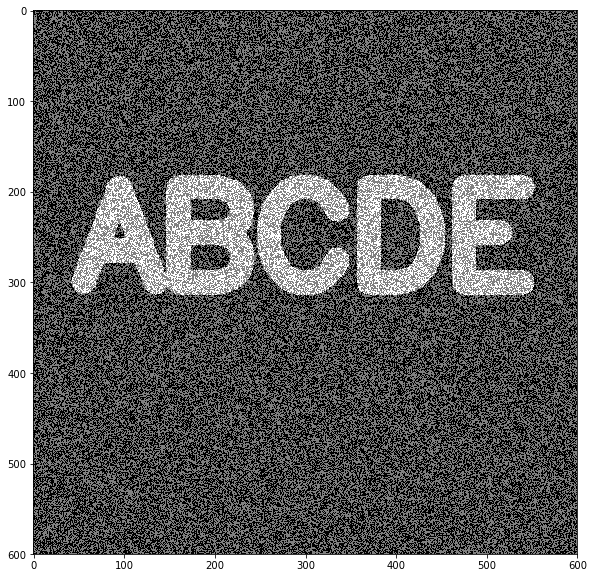

In [107]:
display_img(black_noise_img)

In [108]:
black_noise_img[black_noise_img==-255] = 0

In [109]:
black_noise_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

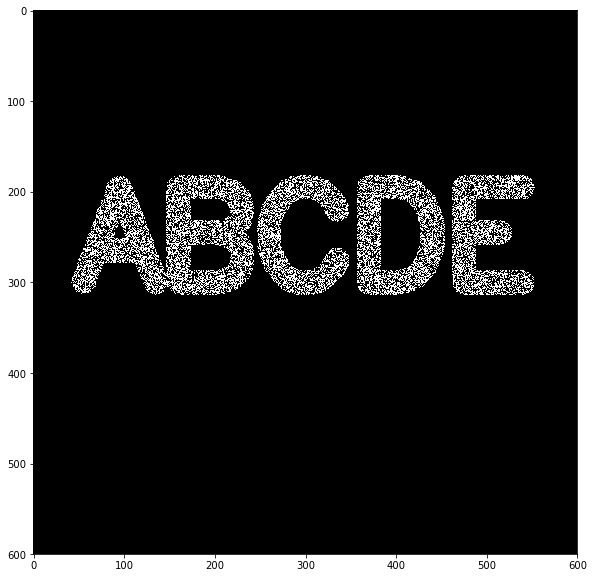

In [110]:
display_img(black_noise_img)

In [116]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE,kernel)

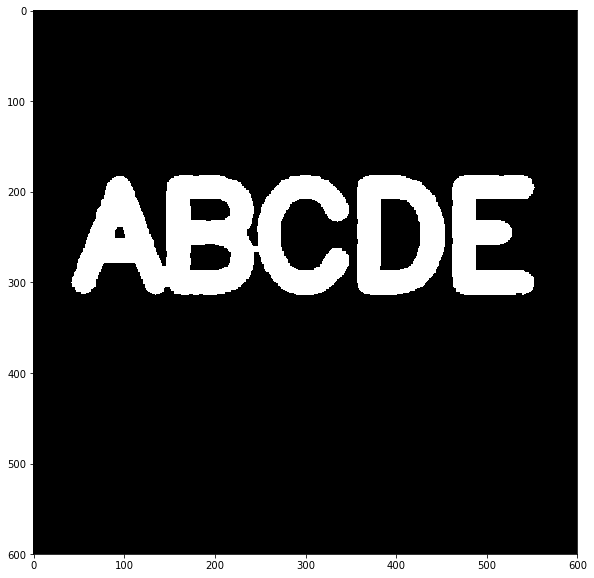

In [118]:
display_img(closing)

In [119]:
#morphological gradient 

In [121]:
img = load_img()

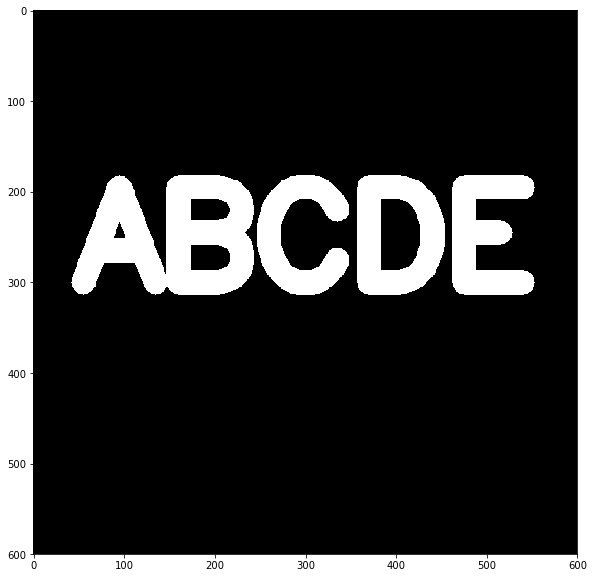

In [123]:
display_img(img)

In [126]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

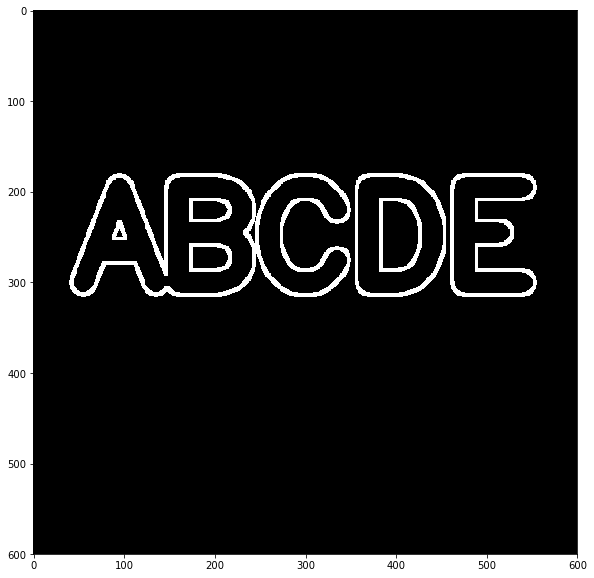

In [127]:
display_img(gradient)